In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Austin', 'S')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

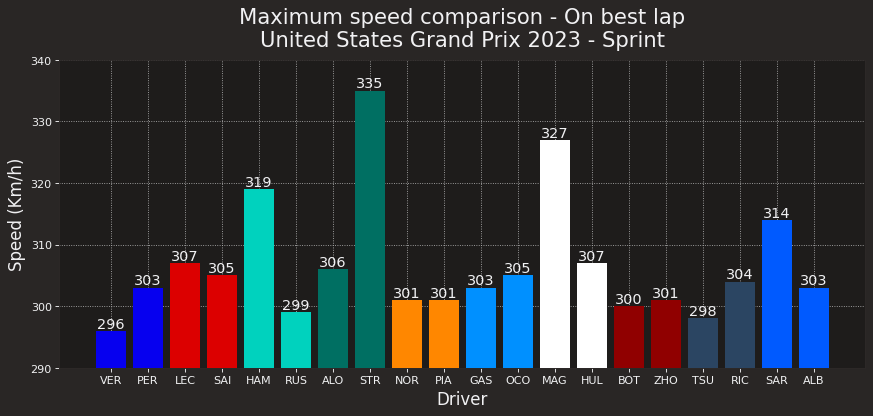

In [4]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        max_speed_dict[driver] = max(fp_laps.pick_driver(driver).pick_fastest().get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'MAG', 'HUL', 'BOT',  'ZHO', 'TSU', 'RIC', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

ff1.plotting.setup_mpl()
figure(figsize=(13, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))

ax = plt.gca()
ax.set_ylim([290, 340])
plt.title(f"Maximum speed comparison - On best lap\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=True, linestyle=':')
plt.xlabel('Driver', fontsize=15)
plt.ylabel('Speed (Km/h)', fontsize=15)
plt.show()

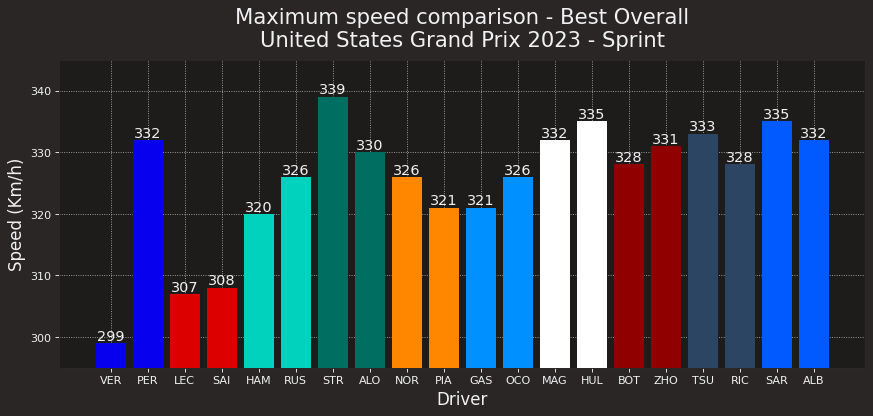

In [6]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull())]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
            max_speed_dict[driver] = max(fp_laps.pick_driver(driver).get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'STR', 'ALO', 'NOR', 'PIA','GAS', 'OCO', 'MAG', 'HUL', 'BOT',  'ZHO', 'TSU', 'RIC', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

ff1.plotting.setup_mpl()
figure(figsize=(13, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))

ax = plt.gca()
ax.set_ylim([295, 345])
plt.title(f"Maximum speed comparison - Best Overall\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=True, linestyle=':')
plt.xlabel('Driver', fontsize=15)
plt.ylabel('Speed (Km/h)', fontsize=15)
plt.show()

In [7]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)
mean_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        max_speed_dict[driver] = max(fp_laps.pick_driver(driver).get_car_data()['Speed'])

for driver in drivers:
        mean_speed_dict[driver] = np.mean(fp_laps.pick_driver(driver).get_car_data()['Speed'])

mean_speed_dict = {pilota: round(velocita, 1) for pilota, velocita in mean_speed_dict.items()}


In [9]:
nomi_piloti = list(max_speed_dict.keys())

velocita_massima_valori = list(max_speed_dict.values())
velocita_media_valori = list(mean_speed_dict.values())

angoli = np.linspace(0, 2 * np.pi, len(nomi_piloti), endpoint=False)

#angoli = np.concatenate((angoli, [angoli[0]]))

#velocita_massima_valori.append(velocita_massima_valori[0])
#velocita_media_valori.append(velocita_media_valori[0])

migliore_velocita_massima_pilota = max(max_speed_dict, key=max_speed_dict.get)
migliore_velocita_media_pilota = max(mean_speed_dict, key=mean_speed_dict.get)

# Trova il pilota con la peggiore velocità massima e media
peggiore_velocita_massima_pilota = min(max_speed_dict, key=max_speed_dict.get)
peggiore_velocita_media_pilota = min(mean_speed_dict, key=mean_speed_dict.get)




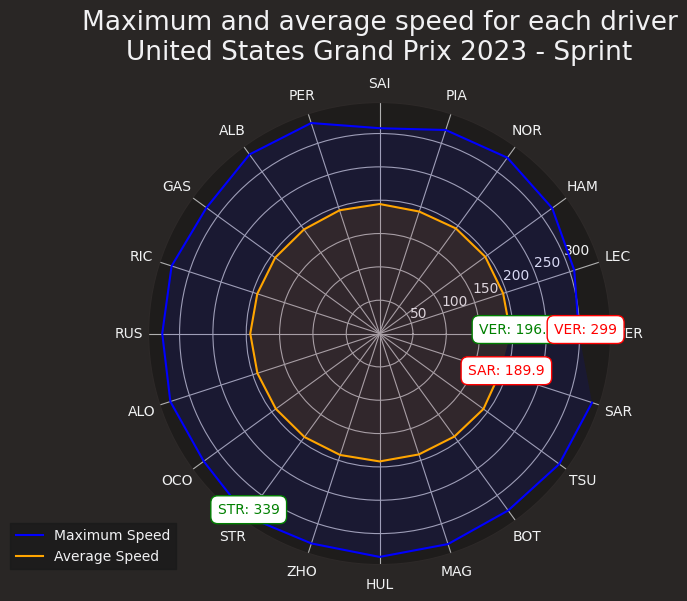

In [11]:
# Crea il grafico radar
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.set_xticks(angoli)
ax.set_xticklabels(nomi_piloti)
plt.polar(angoli, velocita_massima_valori, label='Maximum Speed', color='blue')
plt.fill(angoli, velocita_massima_valori, 'blue', alpha=0.1)
plt.polar(angoli, velocita_media_valori, label='Average Speed', color='orange')
plt.fill(angoli, velocita_media_valori, 'orange', alpha=0.1)

# Etichette dei piloti con migliori e peggiori velocità
plt.text(angoli[velocita_massima_valori.index(max_speed_dict[migliore_velocita_massima_pilota])],
         max_speed_dict[migliore_velocita_massima_pilota] - 5,
         f'{migliore_velocita_massima_pilota}: {max_speed_dict[migliore_velocita_massima_pilota]}',
         fontsize=10, color='green', ha='center',
          bbox=dict(boxstyle='round,pad=0.5', edgecolor='g', facecolor='white'))
plt.text(angoli[velocita_media_valori.index(mean_speed_dict[migliore_velocita_media_pilota])],
         mean_speed_dict[migliore_velocita_media_pilota] + 10,
         f'{migliore_velocita_media_pilota}: {mean_speed_dict[migliore_velocita_media_pilota]}',
         fontsize=10, color='green', ha='center',
          bbox=dict(boxstyle='round,pad=0.5', edgecolor='g', facecolor='white'))

plt.text(angoli[velocita_massima_valori.index(max_speed_dict[peggiore_velocita_massima_pilota])],
         max_speed_dict[peggiore_velocita_massima_pilota] + 10,
         f'{peggiore_velocita_massima_pilota}: {max_speed_dict[peggiore_velocita_massima_pilota]}',
         fontsize=10, color='red', ha='center',
          bbox=dict(boxstyle='round,pad=0.5', edgecolor='r', facecolor='white'))
plt.text(angoli[velocita_media_valori.index(mean_speed_dict[peggiore_velocita_media_pilota])],
         mean_speed_dict[peggiore_velocita_media_pilota] + 10,
         f'{peggiore_velocita_media_pilota}: {mean_speed_dict[peggiore_velocita_media_pilota]}',
         fontsize=10, color='red', ha='center',
          bbox=dict(boxstyle='round,pad=0.5', edgecolor='r', facecolor='white'))

# Personalizza il grafico radar
plt.thetagrids(angoli * 180/np.pi, nomi_piloti)
plt.title(f"Maximum and average speed for each driver\n"f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.legend(loc=(-0.3,-0.01))

# Visualizza il grafico
plt.show()

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

race = fastf1.get_session(2023, "Austin", 'S')
race.load()
laps = race.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}





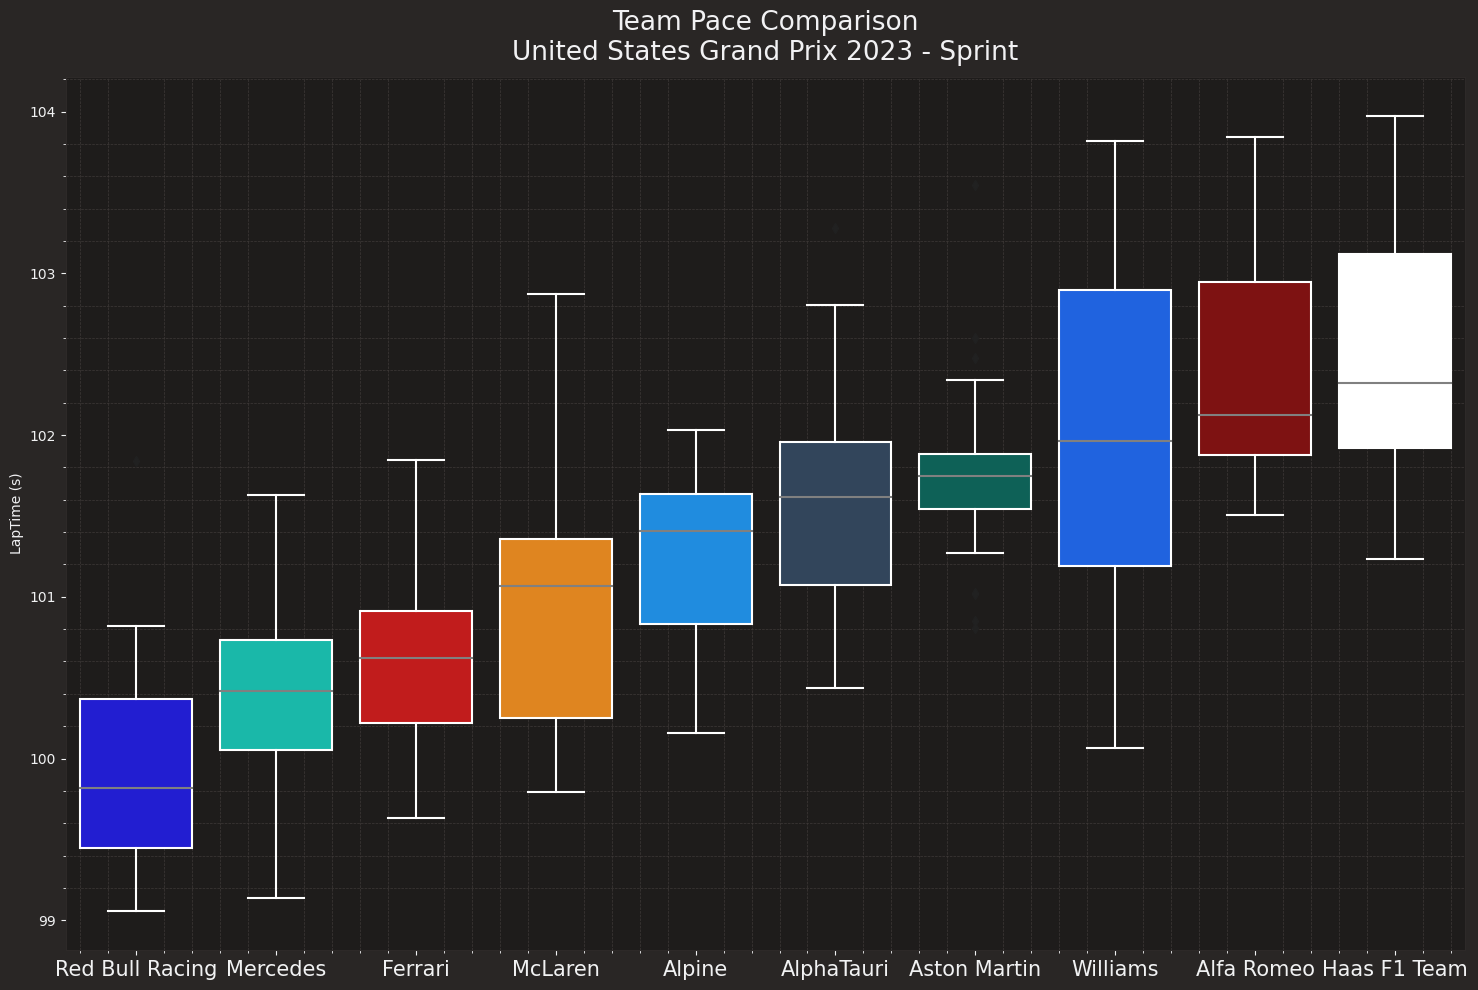

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

ax.tick_params(axis='x', labelsize=15)

plt.title(f"Team Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [ ]:
race = fastf1.get_session(2023, "Austin", 'S')
race.load()
laps = race.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating drivers to hex codes
driver_palette =  dict()
for driver in team_order:
    driver_palette[driver] = "#"+race.results[race.results['Abbreviation'] == driver]['TeamColor'].values[0]

display(driver_palette)

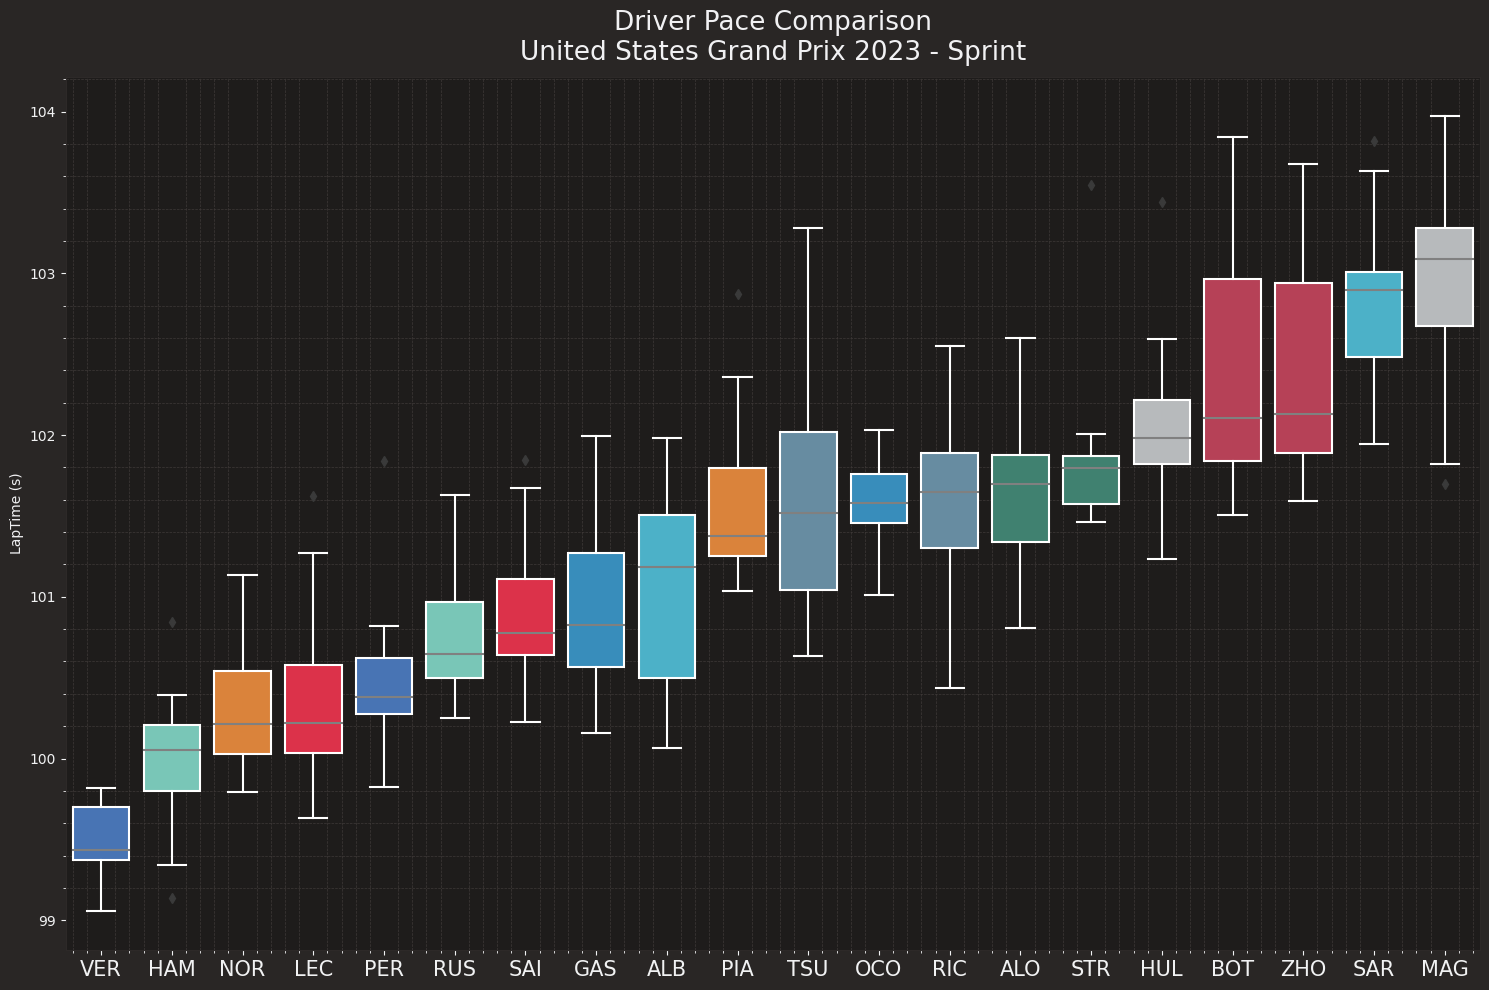

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    order=team_order,
    palette=driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

ax.tick_params(axis='x', labelsize=15)

plt.title(f"Driver Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()